# Semana 6 Continuação Pensamento estatístico em Python

# Import

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# sklearn !!!
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

# Data Set de Examplo 
from sklearn.datasets import make_blobs

## Dados de Exemplo

In [7]:
X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)

In [9]:
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9
0,1.111460,10.625660,6.917054,7.240412,-7.504841,-10.294909,0.873230,-6.752584,2.724180,0.136606
1,3.922212,-5.457902,6.037059,10.372529,-3.383697,5.837285,-8.166151,-1.318083,-9.058159,9.955288
2,8.998367,1.313214,8.651334,6.086529,0.962872,-7.069004,9.286666,-11.965042,-4.219077,-4.333978
3,0.076301,8.199190,-2.716994,-7.578235,-7.772931,-3.542986,4.285229,3.948615,-1.028294,3.300239
4,8.947106,2.617702,11.026892,0.614568,4.029671,-5.606354,7.968009,-9.516573,-7.851421,-0.191799
...,...,...,...,...,...,...,...,...,...,...
95,10.567662,0.524332,10.269804,7.761117,3.255681,-8.144484,10.962038,-8.842276,-3.592750,0.748741
96,1.183529,-0.472691,9.285023,10.385595,-1.168886,1.796147,-6.928412,-2.243654,-9.668088,10.398088
97,3.196211,9.309694,-1.049454,-7.360667,-7.631621,-3.495608,0.262089,0.415383,0.682991,3.778166
98,10.997585,-5.866190,8.500031,14.127744,-5.464811,3.456962,-10.164113,-1.317980,-11.215773,8.993967


In [11]:
pd.DataFrame(Y1)

,0
0,2
1,1
2,0
3,3
4,0
...,...
95,0
96,1
97,3
98,1


### PCA

In [12]:
#Criando um objeto PCA
pca = PCA()

In [13]:
#Transformando os dados
pca_var = pca.fit_transform(X1)

In [25]:
#Um DataFrame
pc_df = pd.DataFrame(data = pca_var )
pc_df['Cluster'] = Y1
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,-0.211825,-0.427672,-0.383225,-3.118039,2.837921,0.197573,2
1,18.931381,0.193838,0.045462,-3.894042,2.302912,-0.929933,-0.065279,1.942375,-1.450321,0.077149,1
2,-6.571463,-14.188490,-3.120115,1.278588,0.531899,3.679456,0.242498,-0.969503,-0.532099,0.217478,0
3,-7.533948,14.439427,-5.443487,3.358252,2.620555,-1.878371,-2.625992,0.102774,-2.077219,1.325812,3
4,-4.591760,-11.315284,-9.130630,-1.420151,-1.436138,0.244743,-1.554324,-2.531840,1.885560,-1.819921,0


In [37]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

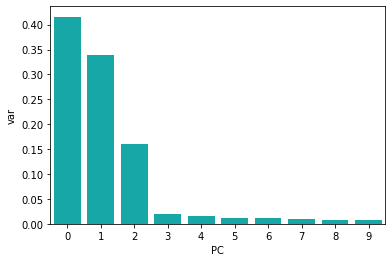

In [27]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':pc_df.columns[:-1]})
sns.barplot(x='PC',y="var", data=df, color="c");

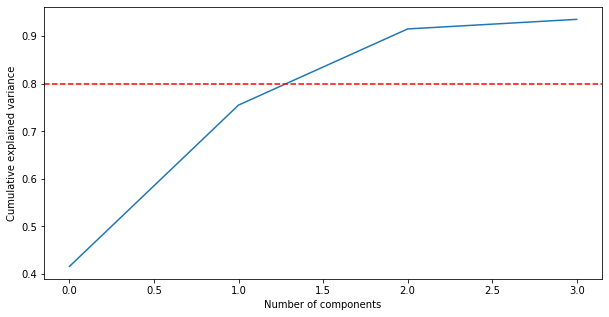

In [41]:
#Gráfico de componestes x explicacão
plt.figure(figsize=(10,5))
g = sns.lineplot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
g.axes.axhline(0.80, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

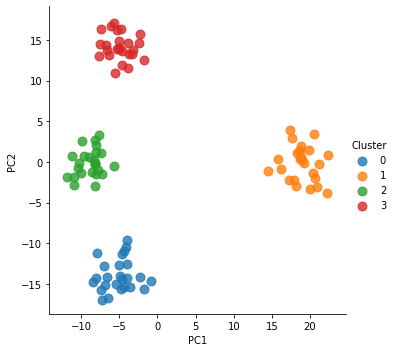

In [34]:
pca = PCA(4)
pca_var = pca.fit_transform(X1)

#Um DataFrame
pc_df = pd.DataFrame(data = pca_var, columns=['PC1','PC2','PC3','PC4'] )
pc_df['Cluster'] = Y1

sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

## Brincando com Flores

In [49]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
iris_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [46]:
iris_df.head(3)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [47]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
# Dados que explicam 
features = ['sepal width', 'petal length', 'petal width','sepal length']
iris_features = iris_df.loc[:, features]
# O que quero prevre
iris_target = df.loc[:,['target']]

In [80]:
pca_iris_0 = PCA()
principalComponents_0 = pca_iris_0.fit_transform(iris_features)
principalDf_0 = pd.DataFrame(data = principalComponents_0)
principalDf_0

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


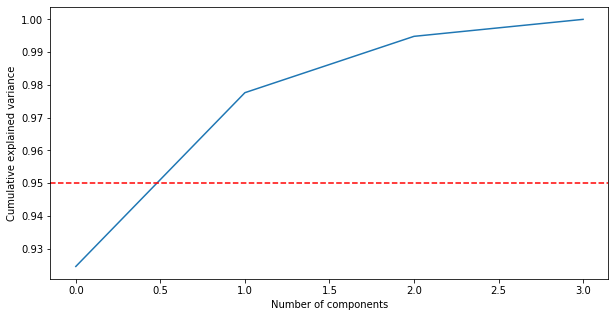

In [82]:
#Gráfico de componestes x explicacão
plt.figure(figsize=(10,5))
iris_g = sns.lineplot(np.arange(len(pca_iris_0.explained_variance_ratio_)), np.cumsum(pca_iris_0.explained_variance_ratio_))
iris_g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [83]:
pca_iris = PCA(n_components=3)
principalComponents = pca_iris.fit_transform(iris_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])
principalDf

,PC1,PC2,PC3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874


In [85]:
pca_iris.explained_variance_ratio_

0.9948169145498101

In [86]:
pca_iris.n_components_

3

In [87]:
pca_iris_2 = PCA(0.95)
principalComponents2 = pca_iris_2.fit_transform(iris_features)
principalDf2 = pd.DataFrame(data = principalComponents2)
principalDf2
pca_iris_2.explained_variance_ratio_
pca_iris_2.n_components_

2

In [88]:
pca_iris_2.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [89]:
pca_iris_2.components_

array([[-0.08226889,  0.85657211,  0.35884393,  0.36158968],
       [ 0.72971237, -0.1757674 , -0.07470647,  0.65653988]])

In [90]:
finalDf = pd.concat([principalDf, iris_df[['target']]], axis = 1)
finalDf

,PC1,PC2,PC3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


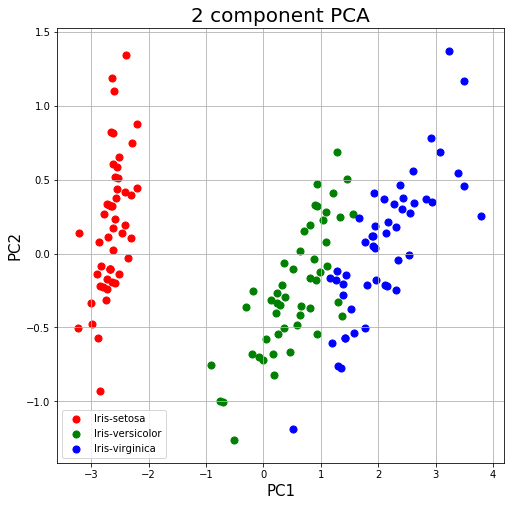

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

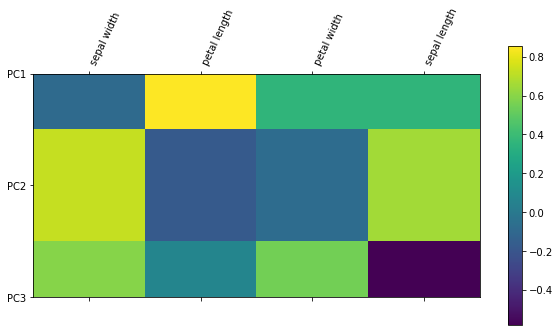

In [68]:
plt.figure(figsize=(10,5))
plt.matshow(pca_iris.components_,cmap='viridis',fignum=1)
plt.yticks([0,1,2],['PC1','PC2','PC3'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(iris_features.columns)),iris_features.columns,rotation=65,ha='left')
plt.show()

In [69]:
iris_features.corr()

,sepal width,petal length,petal width,sepal length
sepal width,1.000000,-0.420516,-0.356544,-0.109369
petal length,-0.420516,1.000000,0.962757,0.871754
petal width,-0.356544,0.962757,1.000000,0.817954
sepal length,-0.109369,0.871754,0.817954,1.000000


## RFE (e outras pequenas coisas)

In [72]:
labels=iris_target.target.unique()
label_encoder=LabelEncoder()
label_ids=label_encoder.fit_transform(labels)
label_ids

array([0, 1, 2])

In [76]:
cols = list(iris_features.columns)

le = LabelEncoder()
iris_target['target_encode'] = le.fit_transform(iris_df.target.values)
iris_target_encode = iris_target[['target_encode']]
iris_target

,target,target_encode
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [77]:
#Criando um Modelo Linear
model = LinearRegression()

In [91]:
#Initializing RFE model
rfe = RFE(model, 3)
#Transforming data using RFE
iris_rfe = rfe.fit_transform(iris_features,iris_target_encode.values.ravel())  
#Fitting the data to model
model.fit(iris_rfe,iris_target_encode.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(list(selected_features_rfe))

[False  True  True  True]
[2 1 1 1]
['petal length', 'petal width', 'sepal length']
